# Desafio Murano Investimentos

# André Luiz Rosário de Azevedo

In [1]:
# Desafio Murano Investimentos

# André Luiz Rosário de Azevedo

In [1]:
## importando bibliotecas necessárias

import os
import time
import csv
import time
from multiprocessing import Pool
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import jit
import seaborn as sns
import heapq

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Questão 1

In [2]:
## Questão 1
# Apenas variaveis numericas (int ou float)

def change_variables(a, b):
    print(f'Antes de executar a funcao: a = {a}, b = {b}')
    a = a + b
    b = a - b
    a = a - b
    print(f'Apos a execucao da funcao: a = {a}, b = {b}')
    return (a,b)

change_variables(9,3)

Antes de executar a funcao: a = 9, b = 3
Apos a execucao da funcao: a = 3, b = 9


(3, 9)

# Questão 2

In [38]:
## Questão 2

#Merge sort

# @jit(nopython = True)
# def mergesort(lista):
#     realizar_mergesort(lista, 0, len(lista))
    
@jit(nopython = True)
def mergesort(lista, first=0, last=None):
    if last == None:
        last = len(lista)
    if (first - last) > 1:
        mid = (first + last)//2
        mergesort(lista, first, mid)
        mergesort(lista, mid, last)
        merge(lista, first, mid, last)
        
@jit(nopython = True)
def merge(lista, first, mid, last):
    left = lista[first:mid]
    right = lista[mid:last]
    
    i = 0
    j = 0
    
    for elem in range(first, last):
        if i >= len(left):
            lista[elem] = right[j]
            j += 1
        elif j >= len(right):
            lista[elem] = left[i]
            i += 1
        elif left[i] < right[j]:
            lista[elem] = left[i]
            i += 1
        else:
            lista[elem] = right[j]
            j += 1

In [2]:
# Quick sort

@jit(nopython = True)
def quicksort(lista):
    # funcao a ser chamada para executar o quicksort.
    realizar_quicksort(lista, 0, len(lista) - 1)

@jit(nopython = True)
def realizar_quicksort(lista, first, last):
    #funcao utilizada para recursao do quicksort
    if first < last:
        splitpoint = particao(lista,first,last)
        
        realizar_quicksort(lista, first, splitpoint-1)
        realizar_quicksort(lista, splitpoint + 1, last)
@jit(nopython = True)

def particao(lista, first, last):
    pivo = lista[first]
    i = first + 1
    j = last
    
    done = False
    while not done:
        while i <= j and lista[i] <= pivo:
            i += 1
        
        while lista[j] >= pivo and j >= i:
            j -= 1
            
        if j < i:
            done = True
            
        else:
            temp = lista[i]
            lista[i] = lista[j]
            lista[j] = temp
            
    temp = lista[first]
    lista[first] = lista[j]
    lista[j] = temp
    
    return j

In [8]:
# Bubble sort

@jit(nopython = True)
def bubblesort(lista):
    for num in range(len(lista) - 1, 0, -1):
        for i in range(num):
            if lista[i] > lista[i + 1]:
                j = lista[i]
                lista[i] = lista[i + 1]
                lista[i + 1] = j
    return lista

In [11]:
#Arrays com os tamanhos N = 10, 10^3 e 10^5 

array5 = np.random.randint(50, size = 10**5)
# array7 = np.random.randint(50, size = 10**7) -> consome muita memoria RAM. Nao consegui executar
# array9 = np.random.randint(50, size = 10**9) -> consome muita memoria RAM. Nao consegui executar
array3 = np.random.randint(50, size = 10**3)
array1 = np.random.randint(50, size = 10)

In [32]:
array1

array([12, 11,  2, 22, 28,  7, 34, 28, 45, 43])

In [39]:
mergesort(array1)
array1

array([12, 11,  2, 22, 28,  7, 34, 28, 45, 43])

In [11]:
%timeit bubblesort(array1)

391 ns ± 3.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [8]:
%timeit bubblesort(array3)

509 µs ± 3.99 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
%timeit bubblesort(array5)

5.19 s ± 440 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit quicksort(array1)

The slowest run took 14.62 times longer than the fastest. This could mean that an intermediate result is being cached.
2.46 µs ± 3.78 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%timeit quicksort(array3)

36 µs ± 764 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [27]:
%timeit quicksort(array5)

68.1 ms ± 726 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%timeit mergeSort(array1)

The slowest run took 11.45 times longer than the fastest. This could mean that an intermediate result is being cached.
2.94 µs ± 3.95 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit mergeSort(array3)

48.6 µs ± 384 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [25]:
# %timeit mergesort(array5)

In [2]:
# Plotando gráficos:


# Questão 3

In [2]:
## Questão 3

def deposito(id_atual, id_futuro, qtd_futuro, juros):
    # taxa de juros mensal fixa
    # depositos a cada mes
    
    # calculando a quantidade de meses
    n = (id_futuro - id_atual)*12
    
    # convertendo a taxa de juros para mensal
    i = ((1 + juros/100)**(1/12))-1
    
    return qtd_futuro*(i/(((1 + i)**n) - 1))

deposito(18, 50, 3000000, 4.25)

3738.4147251236504

# Questão 4

In [14]:
## Questão 4
class dadosalunos():
    """
    Classe que funciona como o Menu da Aplicação
    """
    
    def __init__(self):
        done = True
        while done:
            direcao = input('Digite C para cadastrar um novo aluno, S para sair da aplicacao, ou E ver estatisticas. ')
            if direcao == 'C':
                CadastroAluno()
            elif direcao == 'S':
                done = False
                break
            elif direcao == 'E':
                ObterEstatisticas()
                
                
class CadastroAluno():
    """
    Classe para Cadastrar o Aluno
    """
    
    def __init__(self):
        try:
            # Solicitar as informações ao usuário:
            self.dre = int(input('Digite o DRE do Aluno a ser cadastrado: '))
            self.curso = input('Digite o Curso do Aluno a ser cadastrado: ')
            self.nome = input('Digite o Nome do Aluno a ser cadastrado: ')
            self.genero = input('Digite o Gênero do Aluno a ser cadastrado: ')
            self.dt_nascimento = input('Digite a Data de Nascimento do Aluno a ser cadastrado: ')
            self.altura = int(input('Digite a Altura do Aluno a ser cadastrado: '))
            self.peso = int(input('Digite Peso do Aluno a ser cadastrado: '))
            self.cra = float(input('Digite o CRA do Aluno a ser cadastrado: '))
            self.cred_obt = int(input('Digite os Créditos Obtidos do Aluno a ser cadastrado: '))
            self.renda = int(input('Digite a Renda do Aluno a ser cadastrado: '))
            self.cadastro()
        except:
            print('Valor inválido')
            pass
        
    def cadastro(self):
        self.dados_aluno = [self.dre, self.curso, self.nome, self.genero, self.dt_nascimento, 
                       self.altura, self.peso, self.cra, self.cred_obt, self.renda]
        
        #Escrevendo dados dos alunos no arquivo csv:
        with open('./alunos.csv', 'a', newline = '') as f:
            escrevelinha = csv.writer(f, delimiter = ',')
            escrevelinha.writerow(self.dados_aluno)
            
            
class ObterEstatisticas():
    """
    Classe para obter Estatísticas dos Alunos cadastrados 
    """
    
    def __init__(self):
        self.conv_df()
        estatistica = input('Digite o dado estatistico que deseja visualizar. ')
        if estatistica == 'media':
            self.media()
        elif estatistica == 'desvio padrao':
            self.desviopadrao()
        elif estatistica == 'head':
            self.head()
    
    def conv_df(self):
        """
        Função que converte o arquivo csv em um DataFrame pandas
        """
        
        cols = ['DRE','Curso', 'Nome', 'Gênero', 'Dt_Nascimento', 'Altura (cm)', 
                'Peso (kg)', 'CRA', 'Créditos Obtidos', 'Renda']
        self.df = pd.read_csv('./alunos.csv', names = cols)
        
    def head(self, linhas = 5):        
        linhas = int(input('Quantas linhas deseja visualizar? '))
        print(self.df.head(linhas))
        return self.df.head(linhas)
    
    def info(self):
        print(self.df.info())
        return self.df.info()
    
    def media(self):
        """
        Calcular média das Alturas, Pesos, CRA e Renda dos Alunos cadastrados
        """
        print(self.df[['Altura (cm)', 'Peso (kg)', 'CRA', 'Renda']].mean())
        return self.df[['Altura (cm)', 'Peso (kg)', 'CRA', 'Renda']].mean()
    
    def desviopadrao(self):
        """
        Calcular desvio padrão das Alturas, Pesos, CRA e Renda dos Alunos cadastrados
        """
        print(self.df[['Altura (cm)', 'Peso (kg)', 'CRA', 'Renda']].std())
        return self.df[['Altura (cm)', 'Peso (kg)', 'CRA', 'Renda']].std()

In [15]:
dadosalunos()

Digite C para cadastrar um novo aluno, S para sair da aplicacao, ou E ver estatisticas. E
Digite o dado estatistico que deseja visualizar. media
Altura (cm)      155.142857
Peso (kg)         57.285714
CRA                6.857143
Renda          16143.142857
dtype: float64
Digite C para cadastrar um novo aluno, S para sair da aplicacao, ou E ver estatisticas. S


# Questão 5

In [2]:
# Questão 5

def vector(N):
    lim_inf = -50 #limite inferior do array
    lim_sup = 50  # limite superior do array
    
    # array com N numeros aleatorios dentro do lim_inf e lim_sup
    return np.random.randint(low = lim_inf, high = lim_sup + 1, size = N)


def somar(vetor):
    return vetor.sum()

def somarhelper(vetor):
    return somar(vetor)       

In [ ]:
# Ta consumindo muita memoria RAM

N = 10**1
K = 4

if __name__ == '__main__':
    vetor = vector(N)
    
    size = N/10
    
    
    pool = Pool(processes = K)
    t = time.time()
    res = pool.apply_async(somar, [vetor])
    
    pool.close()
    pool.join()

    print(f'{time.time() - t} s')

In [14]:
print(res.get())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


TypeError: 'int' object is not iterable

# Questão 6

In [16]:
# Questão 6:

#classe para definir um grafo
class Graph():
    """
    Classe para definir e manipular grafos
    """
    
    def __init__(self, arquivo):
        """
        Inicialização da classe
        """
        
        # abrindo arquivo que contem o grafo, que sera passado na entrada
        arq_grafo = open(arquivo, 'r')
        cont = 0
        # quantidade de vertices do grafo
        self.vertice = 0
        # variavel auxiliar, que é um dicionario que vai armazenar o grafo
        d = {}
        
        # escrevendo o grafo como um dicionario
        for line in arq_grafo:
            
            if cont == 0:
                self.vertice = int(line)
                cont += 1
                
            else:
                #x = vertice A, y = vertice B, w = peso aresta
                x, y, w = map(str, line.split())
                
                if x in d:
                    d[x].update([[y, float(w)]])
                else:
                    d[x] = dict([[y, float(w)]])
                if y in d:
                    d[y].update([[x, float(w)]])
                else:
                    d[y] = dict([[x, float(w)]])
                
        self.grafo = d
        self.vertices = self.vertice     
    
    def dijkstra(self,start):
        """
        Função para calcular a menor distância entre vértices,
        através do algoritmo de Dijkstra
        """
        
        # definindo infinito
        inf = 10**8
        # distancia entre cada vertice. De acordo com o algoritmo de dijkstra,
        # inicialmente, a distância é infinita. Exceto pelo próprio vértice de começo (start)
        resultado = {v: inf for v in self.grafo}
        resultado[start] = 0
        
        #heap
        h = [(0, start)]
        while len(h) > 0:
            dist, vertice = heapq.heappop(h)
            if dist > resultado[vertice]:
                continue
            try:
                for v, w in self.grafo[vertice].items():
                    distance = dist + w
                    if distance < resultado[v]:
                        resultado[v] = distance
                        heapq.heappush(h, (distance, v))
            except:
                pass

        return resultado

In [17]:
# Para o grafo do arquivo "grafo_W_1":

g1 = Graph('grafo_W_1.txt')

In [18]:
# Distância do vértice 1 até os vértices 10, 20, 30, 40, 50
res = g1.dijkstra('1')
print('Grafo 1. Vértice 1: ')
print(f"Até vértice 10 -> {res['10']}")
print(f"Até vértice 20 -> {res['20']}")
print(f"Até vértice 30 -> {res['30']}")
print(f"Até vértice 40 -> {res['40']}")
print(f"Até vértice 50 -> {res['50']}")

Grafo 1. Vértice 1: 
Até vértice 10 -> 0.97
Até vértice 20 -> 1.2400000000000002
Até vértice 30 -> 0.69
Até vértice 40 -> 1.18
Até vértice 50 -> 1.31


In [19]:
# Para o grafo do arquivo "grafo_W_2":

g2 = Graph('grafo_W_2.txt')

In [20]:
# Distância do vértice 1 até os vértices 10, 20, 30, 40, 50
res = g2.dijkstra('1')
print('Grafo 2. Vértice 1: ')
print(f"Até vértice 10 -> {res['10']}")
print(f"Até vértice 20 -> {res['20']}")
print(f"Até vértice 30 -> {res['30']}")
print(f"Até vértice 40 -> {res['40']}")
print(f"Até vértice 50 -> {res['50']}")

Grafo 2. Vértice 1: 
Até vértice 10 -> 1.7000000000000002
Até vértice 20 -> 1.6800000000000004
Até vértice 30 -> 2.3899999999999997
Até vértice 40 -> 1.8599999999999999
Até vértice 50 -> 2.29


In [16]:
# Para o grafo do arquivo "grafo_W_3":

g3 = Graph('grafo_W_3.txt')

In [18]:
# Distância do vértice 1 até os vértices 10, 20, 30, 40, 50
res = g3.dijkstra('1')
print('Grafo 3. Vértice 1: ')
print(f"Até vértice 10 -> {res['10']}")
print(f"Até vértice 20 -> {res['20']}")
print(f"Até vértice 30 -> {res['30']}")
print(f"Até vértice 40 -> {res['40']}")
print(f"Até vértice 50 -> {res['50']}")

Grafo 3. Vértice 1: 
Até vértice 10 -> 1.9100000000000001
Até vértice 20 -> 1.9699999999999998
Até vértice 30 -> 2.7800000000000002
Até vértice 40 -> 2.41
Até vértice 50 -> 2.0700000000000003


# Questão 7

## Questão 7 Letra A

In [21]:
## Questão 7
## letra A

# Abrindo csv como DataFrame de cada ação, contendo apenas as colunas Date e Close, que serão analisadas

# Amazon
df_amzn = pd.read_csv('./Stocks/amzn.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# Facebook
df_fb = pd.read_csv('./Stocks/fb.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# Oracle
df_orcl = pd.read_csv('./Stocks/orcl.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# Twitter
df_twtr = pd.read_csv('./Stocks/twtr.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# IBM
df_ibm = pd.read_csv('./Stocks/ibm.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# Walmart
df_wmt = pd.read_csv('./Stocks/wmt.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# UnitedHealth Group
df_unh = pd.read_csv('./Stocks/unh.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# Netflix
df_nflx = pd.read_csv('./Stocks/nflx.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# Lifeway Foods
df_lway = pd.read_csv('./Stocks/lway.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# NVIDIA
df_nvda = pd.read_csv('./Stocks/nvda.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

In [22]:
#Função para calcular média móvel:
def mediamovel(dataframe, N):
    df_media = pd.DataFrame(dataframe['Close'].rolling(window = N).mean())
    return df_media

### Ações da Amazon

In [23]:
## Calculando médias moveis da Amazon
# notaçao: df_mXX_Y => XX: janela de tempo, Y: ação 

df_m10_amzn = mediamovel(df_amzn, 10)
df_m20_amzn = mediamovel(df_amzn, 20)
df_m50_amzn = mediamovel(df_amzn, 50)
df_m200_amzn = mediamovel(df_amzn, 200)

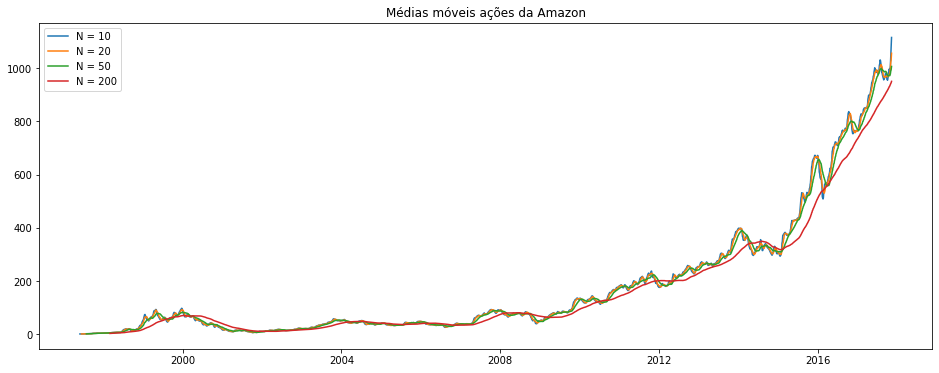

In [24]:
# Plotando gráfico das médias móveis
plt.figure(figsize = (16,6))
plt.title('Médias móveis ações da Amazon')
plt.plot(df_m10_amzn, label = 'N = 10')
plt.plot(df_m20_amzn, label = 'N = 20')
plt.plot(df_m50_amzn, label = 'N = 50')
plt.plot(df_m200_amzn, label = 'N = 200')
plt.legend()

### Ações do Facebook

In [107]:
## Calculando médias moveis do Facebook
# notaçao: df_mXX_Y => XX: janela de tempo, Y: ação 

df_m10_fb = mediamovel(df_fb, 10)
df_m20_fb = mediamovel(df_fb, 20)
df_m50_fb = mediamovel(df_fb, 50)
df_m200_fb = mediamovel(df_fb, 200)

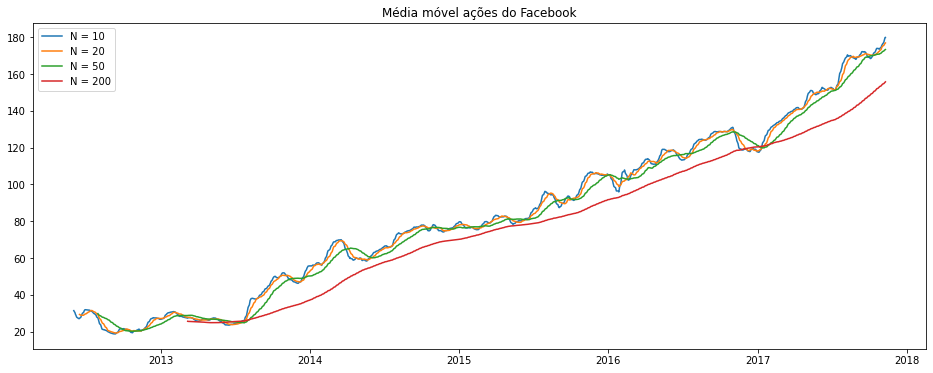

In [156]:
# Plotando gráfico das médias móveis
plt.figure(figsize = (16,6))
plt.title('Médias móveis ações do Facebook')
plt.plot(df_m10_fb, label = 'N = 10')
plt.plot(df_m20_fb, label = 'N = 20')
plt.plot(df_m50_fb, label = 'N = 50')
plt.plot(df_m200_fb, label = 'N = 200')
plt.legend()

### Ações da Oracle

In [109]:
## Calculando médias moveis da Oracle
# notaçao: df_mXX_Y => XX: janela de tempo, Y: ação 

df_m10_orcl = mediamovel(df_orcl, 10)
df_m20_orcl = mediamovel(df_orcl, 20)
df_m50_orcl = mediamovel(df_orcl, 50)
df_m200_orcl = mediamovel(df_orcl, 200)

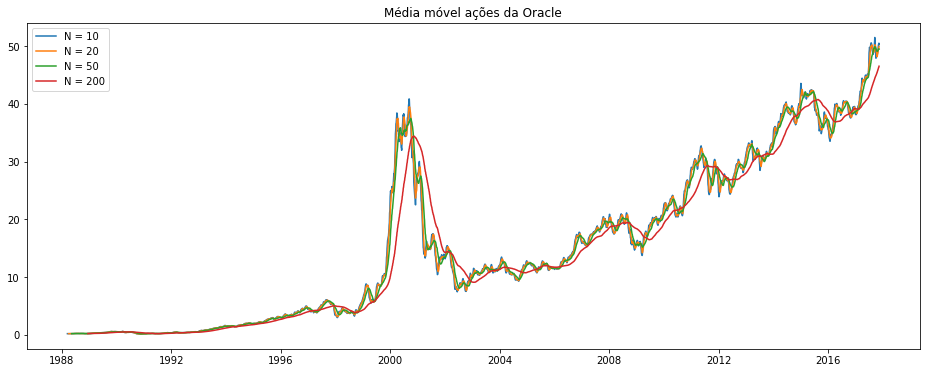

In [157]:
# Plotando gráfico das médias móveis
plt.figure(figsize = (16,6))
plt.title('Médias móveis ações da Oracle')
plt.plot(df_m10_orcl, label = 'N = 10')
plt.plot(df_m20_orcl, label = 'N = 20')
plt.plot(df_m50_orcl, label = 'N = 50')
plt.plot(df_m200_orcl, label = 'N = 200')
plt.legend()

### Ações do Twitter

In [118]:
## Calculando médias moveis do Twitter
# notaçao: df_mXX_Y => XX: janela de tempo, Y: ação 

df_m10_twtr = mediamovel(df_twtr, 10)
df_m20_twtr = mediamovel(df_twtr, 20)
df_m50_twtr = mediamovel(df_twtr, 50)
df_m200_twtr = mediamovel(df_twtr, 200)

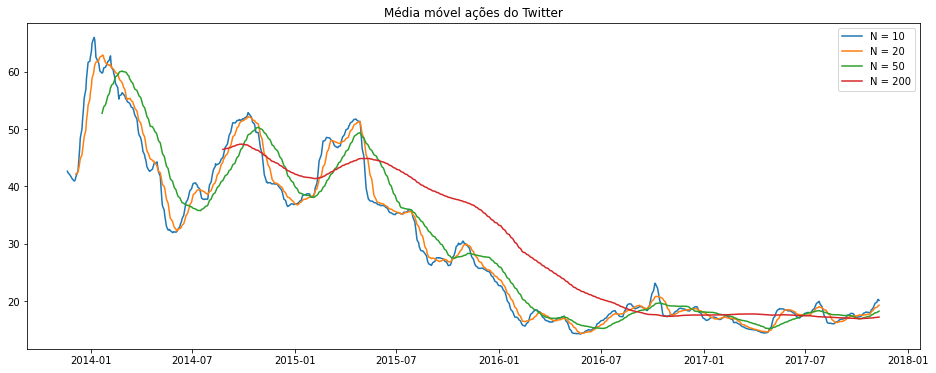

In [158]:
# Plotando gráfico das médias móveis
plt.figure(figsize = (16,6))
plt.title('Médias móveis ações do Twitter')
plt.plot(df_m10_twtr, label = 'N = 10')
plt.plot(df_m20_twtr, label = 'N = 20')
plt.plot(df_m50_twtr, label = 'N = 50')
plt.plot(df_m200_twtr, label = 'N = 200')
plt.legend()

### Ações da IBM

In [113]:
## Calculando médias moveis da IBM
# notaçao: df_mXX_Y => XX: janela de tempo, Y: ação 

df_m10_ibm = mediamovel(df_ibm, 10)
df_m20_ibm = mediamovel(df_ibm, 20)
df_m50_ibm = mediamovel(df_ibm, 50)
df_m200_ibm = mediamovel(df_ibm, 200)

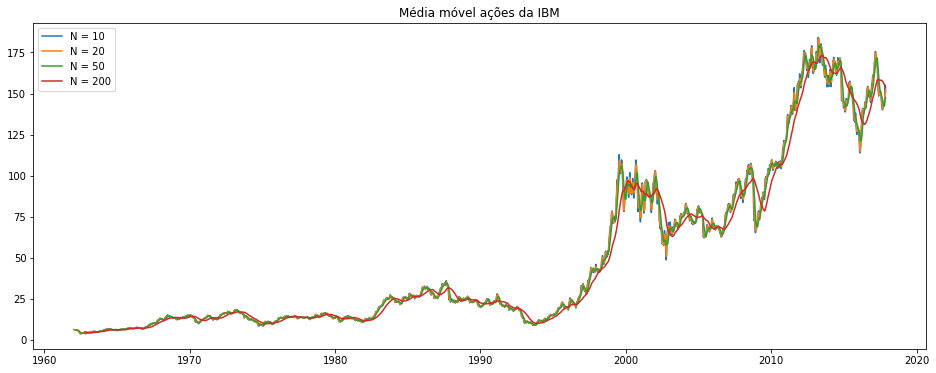

In [159]:
# Plotando gráfico das médias móveis
plt.figure(figsize = (16,6))
plt.title('Médias móveis ações da IBM')
plt.plot(df_m10_ibm, label = 'N = 10')
plt.plot(df_m20_ibm, label = 'N = 20')
plt.plot(df_m50_ibm, label = 'N = 50')
plt.plot(df_m200_ibm, label = 'N = 200')
plt.legend()

### Ações do Walmart

In [115]:
## Calculando médias moveis do Walmart
# notaçao: df_mXX_Y => XX: janela de tempo, Y: ação  

df_m10_wmt = mediamovel(df_wmt, 10)
df_m20_wmt = mediamovel(df_wmt, 20)
df_m50_wmt = mediamovel(df_wmt, 50)
df_m200_wmt = mediamovel(df_wmt, 200)

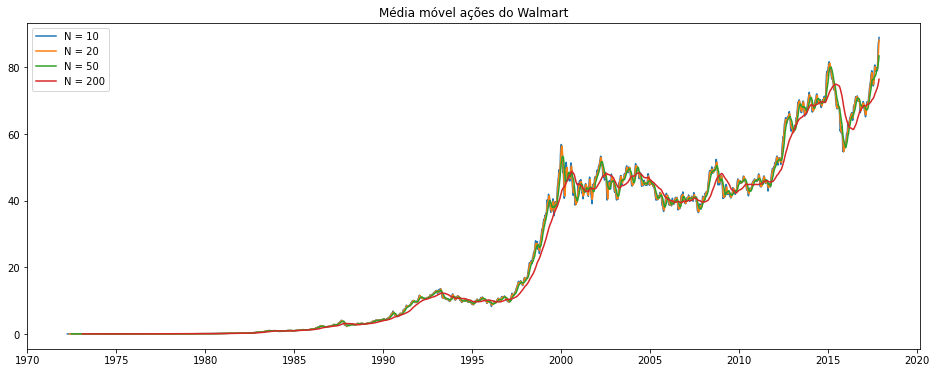

In [160]:
# Plotando gráfico das médias móveis
plt.figure(figsize = (16,6))
plt.title('Médias móveis ações do Walmart')
plt.plot(df_m10_wmt, label = 'N = 10')
plt.plot(df_m20_wmt, label = 'N = 20')
plt.plot(df_m50_wmt, label = 'N = 50')
plt.plot(df_m200_wmt, label = 'N = 200')
plt.legend()

### Ações da UnitedHealth Group

In [133]:
## Calculando médias moveis da UnitedHealth Group
# notaçao: df_mXX_Y => XX: janela de tempo, Y: ação  

df_m10_unh = mediamovel(df_unh, 10)
df_m20_unh = mediamovel(df_unh, 20)
df_m50_unh = mediamovel(df_unh, 50)
df_m200_unh = mediamovel(df_unh, 200)

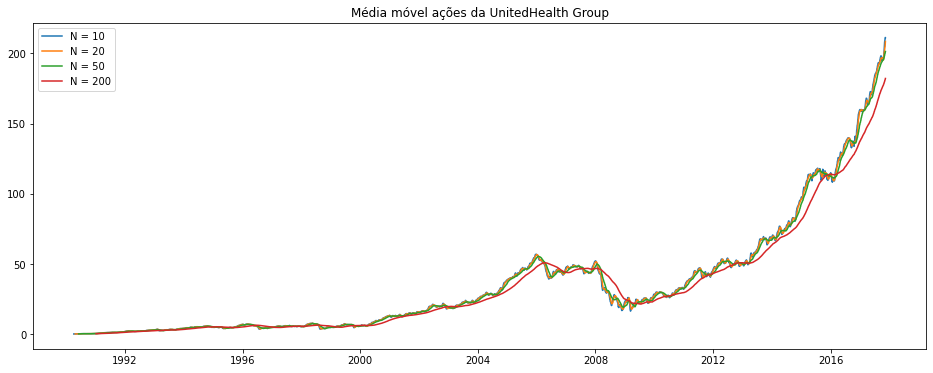

In [161]:
# Plotando gráfico das médias móveis
plt.figure(figsize = (16,6))
plt.title('Médias móveis ações da UnitedHealth Group')
plt.plot(df_m10_unh, label = 'N = 10')
plt.plot(df_m20_unh, label = 'N = 20')
plt.plot(df_m50_unh, label = 'N = 50')
plt.plot(df_m200_unh, label = 'N = 200')
plt.legend()

### Ações da Netflix

In [125]:
## Calculando médias moveis da Netflix
# notaçao: df_mXX_Y => XX: janela de tempo, Y: ação   

df_m10_nflx = mediamovel(df_nflx, 10)
df_m20_nflx = mediamovel(df_nflx, 20)
df_m50_nflx = mediamovel(df_nflx, 50)
df_m200_nflx = mediamovel(df_nflx, 200)

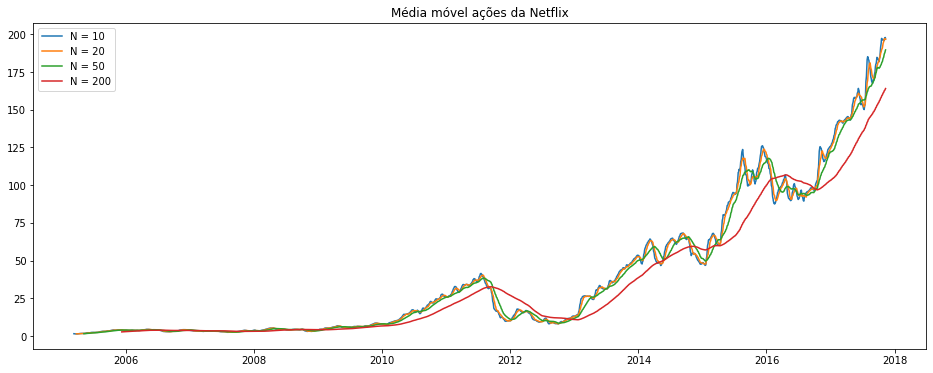

In [162]:
# Plotando gráfico das médias móveis
plt.figure(figsize = (16,6))
plt.title('Médias móveis ações da Netflix')
plt.plot(df_m10_nflx, label = 'N = 10')
plt.plot(df_m20_nflx, label = 'N = 20')
plt.plot(df_m50_nflx, label = 'N = 50')
plt.plot(df_m200_nflx, label = 'N = 200')
plt.legend()

### Ações da Lifeway Foods

In [127]:
## Calculando médias moveis da Lifeway Foods
# notaçao: df_mXX_Y => XX: janela de tempo, Y: ação 

df_m10_lway = mediamovel(df_lway, 10)
df_m20_lway = mediamovel(df_lway, 20)
df_m50_lway = mediamovel(df_lway, 50)
df_m200_lway = mediamovel(df_lway, 200)

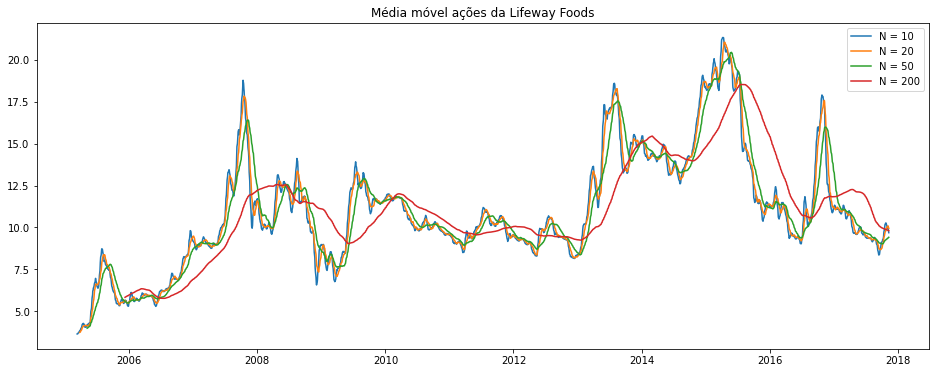

In [163]:
# Plotando gráfico das médias móveis
plt.figure(figsize = (16,6))
plt.title('Médias móveis ações da Lifeway Foods')
plt.plot(df_m10_lway, label = 'N = 10')
plt.plot(df_m20_lway, label = 'N = 20')
plt.plot(df_m50_lway, label = 'N = 50')
plt.plot(df_m200_lway, label = 'N = 200')
plt.legend()

### Ações da NVIDIA

In [131]:
## Calculando médias moveis da NVIDIA
# notaçao: df_mXX_Y => XX: janela de tempo, Y: ação 

df_m10_nvda = mediamovel(df_nvda, 10)
df_m20_nvda = mediamovel(df_nvda, 20)
df_m50_nvda = mediamovel(df_nvda, 50)
df_m200_nvda = mediamovel(df_nvda, 200)

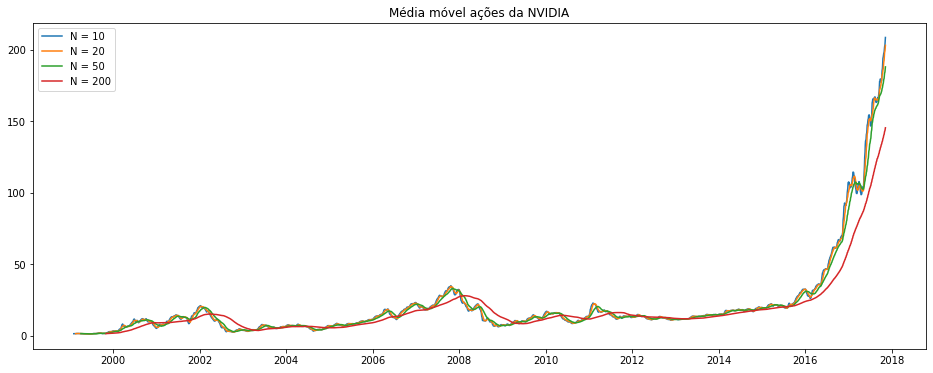

In [164]:
# Plotando gráfico das médias móveis
plt.figure(figsize = (16,6))
plt.title('Média móvel ações da NVIDIA')
plt.plot(df_m10_nvda, label = 'N = 10')
plt.plot(df_m20_nvda, label = 'N = 20')
plt.plot(df_m50_nvda, label = 'N = 50')
plt.plot(df_m200_nvda, label = 'N = 200')
plt.legend()

In [22]:
# Comentando os resultados:

# Temos que a média móvel, conforme aumentamos o valor de N, nos dá uma tendência do comportamento de uma curva.

## Questão 7 Letra B

In [25]:
## Questão 7 Letra B
# Calculando a porcentagem de variação da coluna Close de cada DataFrame, 
# para poder fazer a correlação entre os preços de fechamento das ações das diferentes empresas.

df_pct_amzn = df_amzn['Close'].pct_change()
df_pct_fb = df_fb['Close'].pct_change()
df_pct_orcl = df_orcl['Close'].pct_change()
df_pct_twtr = df_twtr['Close'].pct_change()
df_pct_ibm = df_ibm['Close'].pct_change()
df_pct_wmt = df_wmt['Close'].pct_change()
df_pct_unh = df_unh['Close'].pct_change()
df_pct_nflx = df_nflx['Close'].pct_change()
df_pct_lway = df_lway['Close'].pct_change()
df_pct_nvda = df_nvda['Close'].pct_change()

In [26]:
# dicionario auxiliar, para poder fazer um DataFrame contendo a correlação
# da porcentagem de variação de cada empresa
dict_corr = {}

lista_dfs = [df_pct_amzn, df_pct_fb, df_pct_orcl, df_pct_twtr, df_pct_ibm, 
            df_pct_wmt, df_pct_unh, df_pct_nflx, df_pct_lway, df_pct_nvda]
lista_cols = ['df_pct_amzn', 'df_pct_fb', 'df_pct_orcl', 'df_pct_twtr', 'df_pct_ibm', 
            'df_pct_wmt', 'df_pct_unh', 'df_pct_nflx', 'df_pct_lway', 'df_pct_nvda']


for i in range(len(lista_dfs)):
    dict_corr[f'{lista_cols[i]}'] = [lista_dfs[i].corr(lista_dfs[j]) for j in range(len(lista_dfs))]

In [27]:
# Transformando o dicionario em DataFrame
df_correlacao = pd.DataFrame(dict_corr, index = lista_cols)
df_correlacao

,df_pct_amzn,df_pct_fb,df_pct_orcl,df_pct_twtr,df_pct_ibm,df_pct_wmt,df_pct_unh,df_pct_nflx,df_pct_lway,df_pct_nvda
df_pct_amzn,1.000000,0.335185,0.320723,0.203962,0.295417,0.235825,0.161248,0.326216,0.185399,0.285915
df_pct_fb,0.335185,1.000000,0.191802,0.268062,0.158794,0.075537,0.181328,0.183220,0.079178,0.200941
df_pct_orcl,0.320723,0.191802,1.000000,0.139095,0.373315,0.258145,0.204292,0.257252,0.242792,0.388618
df_pct_twtr,0.203962,0.268062,0.139095,1.000000,0.105676,0.068311,0.102051,0.214374,0.099795,0.177895
df_pct_ibm,0.295417,0.158794,0.373315,0.105676,1.000000,0.145484,0.190867,0.236542,0.232822,0.375082
df_pct_wmt,0.235825,0.075537,0.258145,0.068311,0.145484,1.000000,0.222012,0.178946,0.172705,0.172334
df_pct_unh,0.161248,0.181328,0.204292,0.102051,0.190867,0.222012,1.000000,0.199469,0.166099,0.145165
df_pct_nflx,0.326216,0.183220,0.257252,0.214374,0.236542,0.178946,0.199469,1.000000,0.100102,0.249414
df_pct_lway,0.185399,0.079178,0.242792,0.099795,0.232822,0.172705,0.166099,0.100102,1.000000,0.185020
df_pct_nvda,0.285915,0.200941,0.388618,0.177895,0.375082,0.172334,0.145165,0.249414,0.185020,1.000000


<AxesSubplot:>

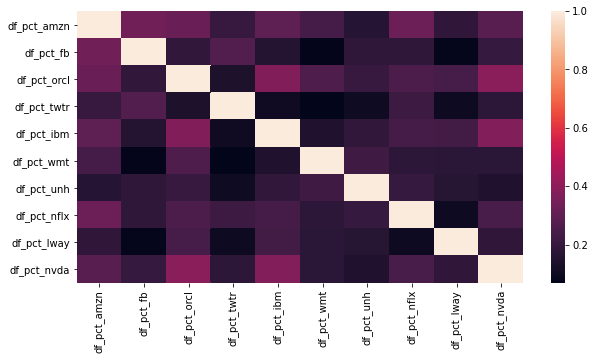

In [28]:
plt.figure(figsize = (10,5))
sns.heatmap(df_correlacao)

In [1]:
# Comentando resultados:

# A correlação foi feita tomando como base a porcentagem das variações das séries temporais.
# As ações escolhidas não estão muito correlacionadas.

# Os 5 pares de ações que possuem maior correlação são: NVIDIA e ORACLE, IBM e ORACLE, IBM e NVIDIA,
# FACEBOOK e AMAZON, e AMAZON e NETFLIX.
# Os pares que possuem menor correlação são: FACEBOOK e WALMART, FACEBOOK e LIFEWAY FOODS, NETFLIX e LIFEWAY FOODS,
# IBM e TWITTER, e TWITTER e UNITEDHEALTH GROUP.

## Questão 7 Letra C

In [21]:
## Questão 7 Letra C
# Foi escolhido fazer um modelo usando LSTM, que é uma boa escolha ao tratar com séries temporais

In [29]:
# DataFrame das ações da Google (goog) contendo apenas a coluna Close, com a Data como indice
data_goog = pd.read_csv('./Stocks/goog.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# DataFrame das ações da Google (googl) contendo apenas a coluna Close, com a Data como indice
data_googl = pd.read_csv('./Stocks/googl.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# DataFrame das ações da Apple (aapl) contendo apenas a coluna Close, com a Data como indice
data_aapl = pd.read_csv('./Stocks/aapl.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# DataFrame das ações da Microsoft (msft) contendo apenas a coluna Close, com a Data como indice
data_msft = pd.read_csv('./Stocks/msft.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

### Ações da Google (goog)

In [30]:
data_goog.head()

,Close
Date,
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


In [31]:
#scaler para normalizar
scaler_goog = MinMaxScaler(feature_range=(0, 1))

# salvando o length dos dados de treino em uma variavel para auxiliar
train_data_len_goog = int(np.round(len(data_goog)*.8))

In [32]:
# numpy array com os preços de fechamento
dataset_goog = data_goog.values

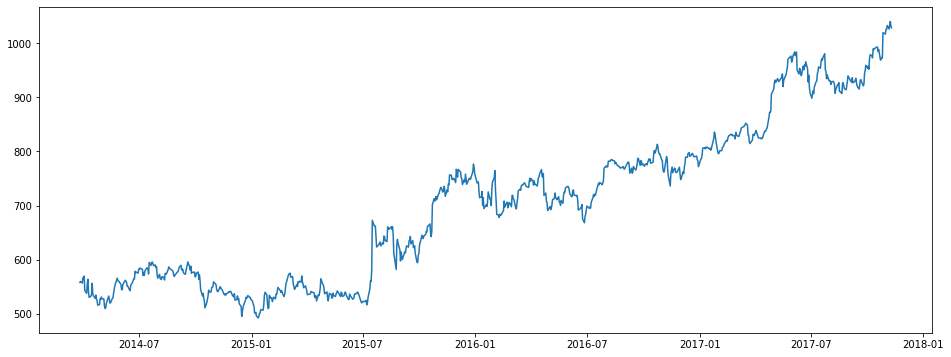

In [33]:
# Visualizando a curva
plt.figure(figsize = (16,6))
plt.plot(data_goog['Close'])

In [34]:
# Normalizando os preços de fechamento para poder fazer o modelo
scaled_data_goog = scaler_goog.fit_transform(dataset_goog)

# Dividindo dados de treino e teste
train_goog = dataset_goog[0:train_data_len_goog]
test_goog = dataset_goog[train_data_len_goog:len(data_goog)]

In [35]:
#Preenchendo variaveis de treino
X_train_goog = []
y_train_goog = []
steps_goog = 40

for i in range(steps_goog,len(train_goog)):
    X_train_goog.append(scaled_data_goog[i - steps_goog:i, 0])
    y_train_goog.append(scaled_data_goog[i, 0])

# transformando em um numpy array
X_train_goog = np.array(X_train_goog)
y_train_goog = np.array(y_train_goog)

X_train_goog = np.reshape(X_train_goog, (X_train_goog.shape[0],X_train_goog.shape[1],1))

In [36]:
print(X_train_goog.shape)
print(y_train_goog.shape)

(693, 40, 1)
(693,)


In [37]:
# Criando modelo

entradas = 1
neuronios_oculta = 50
neuronios_saida = 1

model_goog = Sequential()
model_goog.add(LSTM(units = neuronios_oculta, return_sequences = True ,input_shape = (X_train_goog.shape[1],1)))
model_goog.add(LSTM(units = neuronios_oculta))
model_goog.add(Dense(units = neuronios_saida))

In [38]:
# Compilando o modelo
model_goog.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
# Treinando modelo
model_goog.fit(X_train_goog, y_train_goog, epochs = 10, batch_size = 32)

Epoch 1/10
22/22 [==============================] - 3s 24ms/step - loss: 0.0473
Epoch 2/10
22/22 [==============================] - 1s 23ms/step - loss: 0.0033
Epoch 3/10
22/22 [==============================] - 0s 22ms/step - loss: 0.0015
Epoch 4/10
22/22 [==============================] - 0s 23ms/step - loss: 0.0015
Epoch 5/10
22/22 [==============================] - 1s 23ms/step - loss: 0.0014
Epoch 6/10
22/22 [==============================] - 0s 22ms/step - loss: 0.0015
Epoch 7/10
22/22 [==============================] - 0s 22ms/step - loss: 0.0011
Epoch 8/10
22/22 [==============================] - 1s 24ms/step - loss: 0.0015
Epoch 9/10
22/22 [==============================] - 0s 22ms/step - loss: 0.0014
Epoch 10/10
22/22 [==============================] - 1s 27ms/step - loss: 0.0012


In [40]:
#testando o modelo

#definindo array com os dados de teste a serem testados
inputs_goog = data_goog[len(data_goog) - len(test_goog) - steps_goog:].values
inputs_goog = inputs_goog.reshape(-1,1)
inputs_goog  = scaler_goog.transform(inputs_goog)

In [41]:
#preenchendo variavel de teste
X_test_goog = []
for i in range(steps_goog,inputs_goog.shape[0]):
    X_test_goog.append(inputs_goog[i - steps_goog:i,0])
X_test_goog = np.array(X_test_goog)

In [42]:
#fazendo predições
X_test_goog = np.reshape(X_test_goog, (X_test_goog.shape[0],X_test_goog.shape[1],1))
close_goog = model_goog.predict(X_test_goog)
close_goog = scaler_goog.inverse_transform(close_goog)

c:\users\andre\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


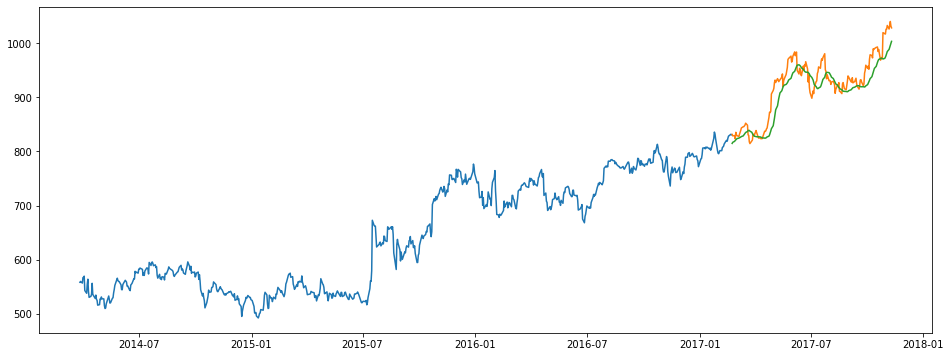

In [43]:
# Plotar grafico

#dataframe com os dados de treino e teste
curva_treino = data_goog[0:train_data_len_goog]
curva_teste = data_goog[train_data_len_goog:len(data_goog)]
curva_teste['Predictions'] = close_goog

#plotando gráfico comparando os resultados da predição e os dados reais
#o resultado da predição é a curva de cor verde
plt.figure(figsize = (16,6))
plt.plot(curva_treino['Close'])
plt.plot(curva_teste[['Close','Predictions']])

### Ações da Google (googl)

In [37]:
data_googl.head()

,Close
Date,
2004-08-19,50.170
2004-08-20,54.155
2004-08-23,54.700
2004-08-24,52.435
2004-08-25,53.000


In [38]:
#scaler para normalizar
scaler_googl = MinMaxScaler(feature_range=(0, 1))

# definindo length dos dados de treino
train_data_len_googl = int(np.round(len(data_googl)*.8))

In [39]:
# numpy array com os preços de fechamento
dataset_googl = data_googl.values

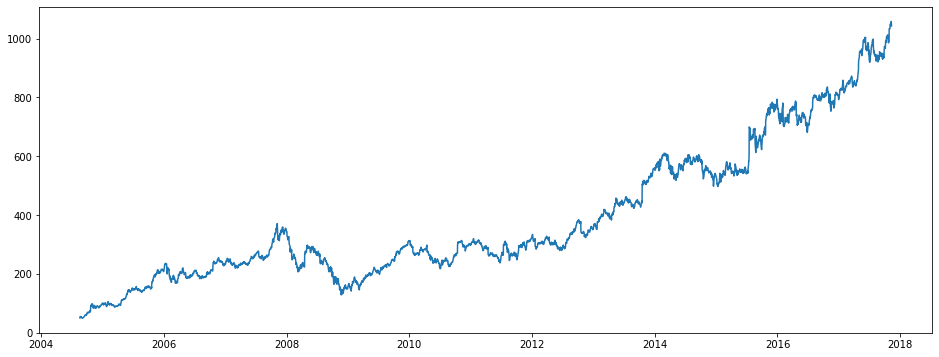

In [40]:
# Visualizando curva
plt.figure(figsize = (16,6))
plt.plot(data_googl['Close'])

In [41]:
# Normalizando os preços de fechamento para poder fazer o modelo
scaled_data_googl = scaler_googl.fit_transform(dataset_googl)

# Dividindo dados de treino e teste
train_googl = dataset_googl[0:train_data_len_googl]
test_googl = dataset_googl[train_data_len_googl:len(data_googl)]

In [42]:
#Preenchendo variaveis de treino
X_train_googl = []
y_train_googl = []
steps_googl = 60

for i in range(steps_googl,len(train_googl)):
    X_train_googl.append(scaled_data_googl[i - steps_googl:i,0])
    y_train_googl.append(scaled_data_googl[i,0])

# transformando em um numpy array
X_train_googl = np.array(X_train_googl)
y_train_googl = np.array(y_train_googl)

X_train_googl = np.reshape(X_train_googl, (X_train_googl.shape[0],X_train_googl.shape[1],1))

In [43]:
print(X_train_googl.shape)
print(y_train_googl.shape)

(2606, 60, 1)
(2606,)


In [44]:
# Criando modelo

entradas = 1
neuronios_oculta = 50
neuronios_saida = 1

model_googl = Sequential()
model_googl.add(LSTM(units = neuronios_oculta, return_sequences = True ,input_shape = (X_train_googl.shape[1],1)))
model_googl.add(LSTM(units = neuronios_oculta))
model_googl.add(Dense(units = neuronios_saida))

In [45]:
# Compilando o modelo
model_googl.compile(optimizer='adam', loss='mean_squared_error')

In [46]:
# Treinando modelo
model_googl.fit(X_train_googl, y_train_googl, epochs = 10, batch_size = 64)

Epoch 1/10
41/41 [==============================] - 7s 71ms/step - loss: 0.0181
Epoch 2/10
41/41 [==============================] - 3s 63ms/step - loss: 2.5022e-04
Epoch 3/10
41/41 [==============================] - 2s 56ms/step - loss: 1.6865e-04
Epoch 4/10
41/41 [==============================] - 3s 73ms/step - loss: 1.6833e-04
Epoch 5/10
41/41 [==============================] - 3s 70ms/step - loss: 1.6492e-04
Epoch 6/10
41/41 [==============================] - 3s 79ms/step - loss: 1.6641e-04
Epoch 7/10
41/41 [==============================] - 3s 65ms/step - loss: 1.5170e-04
Epoch 8/10
41/41 [==============================] - 3s 76ms/step - loss: 1.5899e-04
Epoch 9/10
41/41 [==============================] - 3s 67ms/step - loss: 1.3743e-04
Epoch 10/10
41/41 [==============================] - 3s 68ms/step - loss: 1.4992e-04


In [47]:
#testando o modelo

#definindo array com os dados de teste a serem testados
inputs_googl = data_googl[len(data_googl) - len(test_googl) - steps_googl:].values
inputs_googl = inputs_googl.reshape(-1,1)
inputs_googl  = scaler_googl.transform(inputs_googl)

In [48]:
#preenchendo variavel de teste
X_test_googl = []
for i in range(steps_googl,inputs_googl.shape[0]):
    X_test_googl.append(inputs_googl[i - steps_googl:i,0])
X_test_googl = np.array(X_test_googl)

In [49]:
#fazendo predições
X_test_googl = np.reshape(X_test_googl, (X_test_googl.shape[0],X_test_googl.shape[1],1))
close_googl = model_googl.predict(X_test_googl)
close_googl = scaler_googl.inverse_transform(close_googl)

c:\users\andre\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


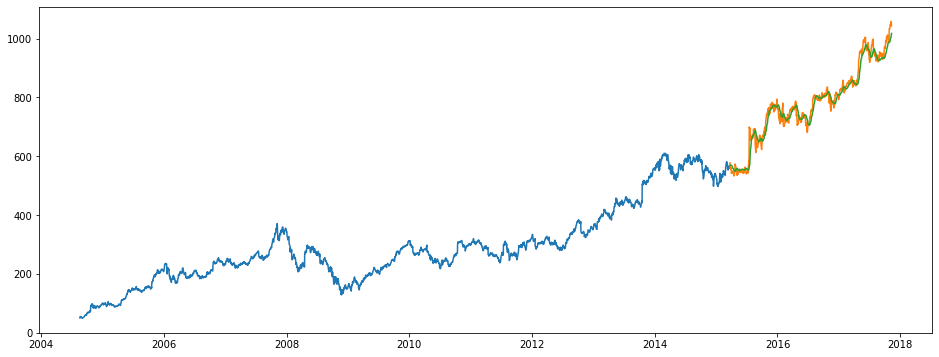

In [50]:
# Plotar grafico

#dataframe com os dados de treino e teste
curva_treino_googl = data_googl[0:train_data_len_googl]
curva_teste_googl = data_googl[train_data_len_googl:len(data_googl)]
curva_teste_googl['Predictions'] = close_googl

#plotando gráfico comparando os resultados da predição e os dados reais
#o resultado da predição é a curva de cor verde
plt.figure(figsize = (16,6))
plt.plot(curva_treino_googl['Close'])
plt.plot(curva_teste_googl[['Close','Predictions']])

### Ações da Apple (aapl)

In [51]:
data_aapl.head()

,Close
Date,
1984-09-07,0.42388
1984-09-10,0.42134
1984-09-11,0.42902
1984-09-12,0.41618
1984-09-13,0.43927


In [52]:
#scaler para normalizar
scaler_aapl = MinMaxScaler(feature_range=(0, 1))

# definindo length dos dados de treino
train_data_len_aapl = int(np.round(len(data_aapl)*.8))

In [53]:
# numpy array com os preços de fechamento
dataset_aapl = data_aapl.values

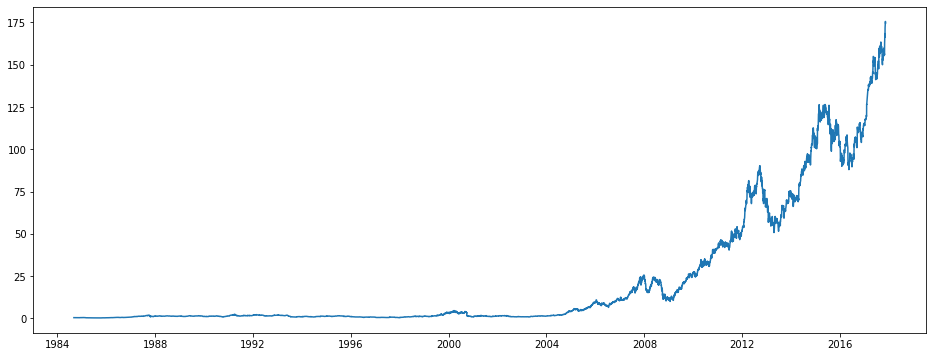

In [54]:
plt.figure(figsize = (16,6))
plt.plot(data_aapl['Close'])

In [55]:
# Normalizando os preços de fechamento para poder fazer o modelo
scaled_data_aapl = scaler_aapl.fit_transform(dataset_aapl)

# Dividindo dados de treino e teste
train_aapl = dataset_aapl[0:train_data_len_aapl]
test_aapl = dataset_aapl[train_data_len_aapl:len(data_aapl)]

In [56]:
#Preenchendo variaveis de treino
X_train_aapl = []
y_train_aapl = []
steps_aapl = 60

for i in range(steps_aapl,len(train_aapl)):
    X_train_aapl.append(scaled_data_aapl[i - steps_aapl:i,0])
    y_train_aapl.append(scaled_data_aapl[i,0])

# transformando em um numpy array
X_train_aapl = np.array(X_train_aapl)
y_train_aapl = np.array(y_train_aapl)

X_train_aapl = np.reshape(X_train_aapl, (X_train_aapl.shape[0],X_train_aapl.shape[1],1))

In [57]:
print(X_train_aapl.shape)
print(y_train_aapl.shape)

(6631, 60, 1)
(6631,)


In [58]:
# Criando modelo

entradas = 1
neuronios_oculta = 50
neuronios_saida = 1

model_aapl = Sequential()
model_aapl.add(LSTM(units = neuronios_oculta, return_sequences = True ,input_shape = (X_train_aapl.shape[1],1)))
model_aapl.add(LSTM(units = neuronios_oculta))
model_aapl.add(Dense(units = neuronios_saida))

In [59]:
# Compilando o modelo
model_aapl.compile(optimizer='adam', loss='mean_squared_error')

In [60]:
# Treinando modelo
model_aapl.fit(X_train_aapl, y_train_aapl, epochs = 10, batch_size = 64)

Epoch 1/10
104/104 [==============================] - 7s 47ms/step - loss: 3.7689e-04
Epoch 2/10
104/104 [==============================] - 7s 69ms/step - loss: 1.0251e-05
Epoch 3/10
104/104 [==============================] - 6s 56ms/step - loss: 9.0390e-06
Epoch 4/10
104/104 [==============================] - 6s 54ms/step - loss: 9.3601e-06
Epoch 5/10
104/104 [==============================] - 6s 54ms/step - loss: 1.1076e-05
Epoch 6/10
104/104 [==============================] - 6s 55ms/step - loss: 7.7254e-06
Epoch 7/10
104/104 [==============================] - 6s 53ms/step - loss: 7.3487e-06
Epoch 8/10
104/104 [==============================] - 6s 54ms/step - loss: 7.8614e-06
Epoch 9/10
104/104 [==============================] - 6s 53ms/step - loss: 7.8558e-06
Epoch 10/10
104/104 [==============================] - 6s 54ms/step - loss: 7.0500e-06


In [61]:
#testando o modelo

#definindo array com os dados de teste a serem testados
inputs_aapl = data_aapl[len(data_aapl) - len(test_aapl) - steps_aapl:].values
inputs_aapl = inputs_aapl.reshape(-1,1)
inputs_aapl  = scaler_aapl.transform(inputs_aapl)

In [62]:
#preenchendo variavel de teste
X_test_aapl = []
for i in range(steps_aapl, inputs_aapl.shape[0]):
    X_test_aapl.append(inputs_aapl[i - steps_aapl:i,0])
X_test_aapl = np.array(X_test_aapl)

In [63]:
#fazendo predições
X_test_aapl = np.reshape(X_test_aapl, (X_test_aapl.shape[0],X_test_aapl.shape[1],1))
close_aapl = model_aapl.predict(X_test_aapl)
close_aapl = scaler_aapl.inverse_transform(close_aapl)

c:\users\andre\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


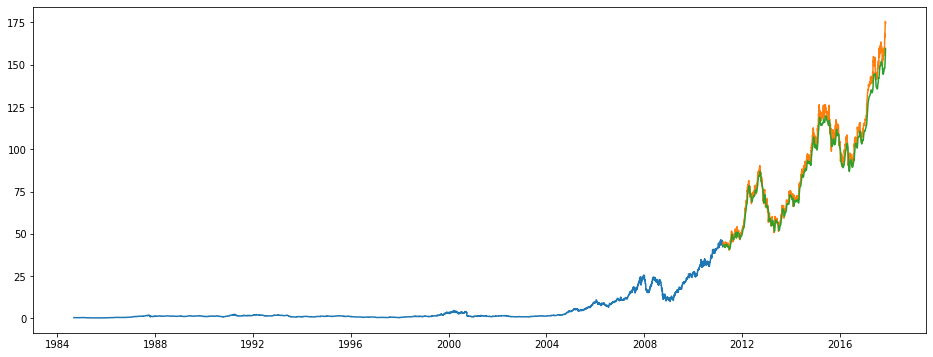

In [64]:
# Plotar grafico

#dataframe com os dados de treino e teste

curva_treino_aapl = data_aapl[0:train_data_len_aapl]
curva_teste_aapl = data_aapl[train_data_len_aapl:len(data_aapl)]
curva_teste_aapl['Predictions'] = close_aapl

#plotando gráfico comparando os resultados da predição e os dados reais
#o resultado da predição é a curva de cor verde
plt.figure(figsize = (16,6))
plt.plot(curva_treino_aapl['Close'])
plt.plot(curva_teste_aapl[['Close','Predictions']])

### Ações da Microsoft (msft)

In [65]:
data_msft.head()

,Close
Date,
1986-03-13,0.07533
1986-03-14,0.07533
1986-03-17,0.07533
1986-03-18,0.07533
1986-03-19,0.07533


In [66]:
#scaler para normalizar
scaler_msft = MinMaxScaler(feature_range=(0, 1))

# definindo length dos dados de treino
train_data_len_msft = int(np.round(len(data_msft)*.8))

In [67]:
# numpy array com os preços de fechamento
dataset_msft = data_msft.values

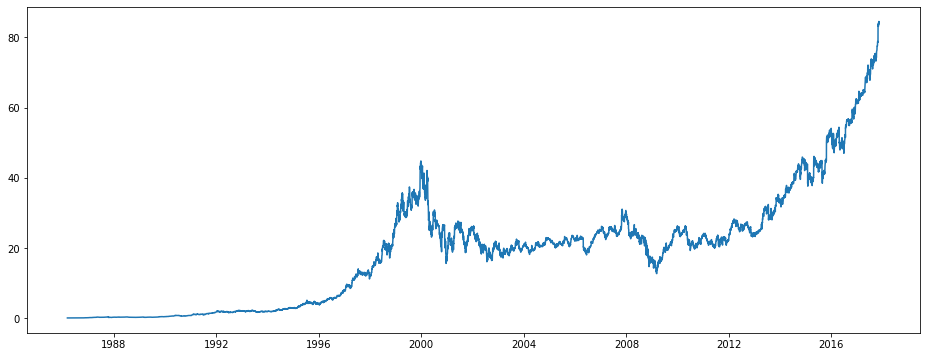

In [68]:
plt.figure(figsize = (16,6))
plt.plot(data_msft['Close'])

In [69]:
# Normalizando os preços de fechamento para poder fazer o modelo
scaled_data_msft = scaler_msft.fit_transform(dataset_msft)

# Dividindo dados de treino e teste
train_msft = dataset_msft[0:train_data_len_msft]
test_msft = dataset_msft[train_data_len_msft:len(data_msft)]

In [70]:
#Preenchendo variaveis de treino
X_train_msft = []
y_train_msft = []
steps_msft = 60

for i in range(steps_msft,len(train_msft)):
    X_train_msft.append(scaled_data_msft[i - steps_msft:i,0])
    y_train_msft.append(scaled_data_msft[i,0])

# transformando em um numpy array
X_train_msft = np.array(X_train_msft)
y_train_msft = np.array(y_train_msft)

X_train_msft = np.reshape(X_train_msft, (X_train_msft.shape[0],X_train_msft.shape[1],1))

In [71]:
print(X_train_msft.shape)
print(y_train_msft.shape)

(6326, 60, 1)
(6326,)


In [72]:
# Criando modelo

entradas = 1
neuronios_oculta = 50
neuronios_saida = 1

model_msft = Sequential()
model_msft.add(LSTM(units = neuronios_oculta, return_sequences = True ,input_shape = (X_train_msft.shape[1],1)))
model_msft.add(LSTM(units = neuronios_oculta))
model_msft.add(Dense(units = neuronios_saida))

In [73]:
# Compilando o modelo
model_msft.compile(optimizer='adam', loss='mean_squared_error')

In [74]:
# Treinando modelo
model_msft.fit(X_train_msft, y_train_msft, epochs = 10, batch_size = 64)

Epoch 1/10
99/99 [==============================] - 8s 52ms/step - loss: 0.0056
Epoch 2/10
99/99 [==============================] - 5s 54ms/step - loss: 1.1338e-04
Epoch 3/10
99/99 [==============================] - 5s 54ms/step - loss: 1.1844e-04
Epoch 4/10
99/99 [==============================] - 5s 55ms/step - loss: 1.0853e-04
Epoch 5/10
99/99 [==============================] - 6s 56ms/step - loss: 1.0405e-04
Epoch 6/10
99/99 [==============================] - 6s 57ms/step - loss: 9.7926e-05
Epoch 7/10
99/99 [==============================] - 5s 54ms/step - loss: 1.0694e-04
Epoch 8/10
99/99 [==============================] - 5s 54ms/step - loss: 9.7568e-05
Epoch 9/10
99/99 [==============================] - 5s 54ms/step - loss: 7.6261e-05
Epoch 10/10
99/99 [==============================] - 5s 55ms/step - loss: 7.5526e-05


In [75]:
#testando o modelo

#definindo array com os dados de teste a serem testados
inputs_msft = data_msft[len(data_msft) - len(test_msft) - steps_msft:].values
inputs_msft = inputs_msft.reshape(-1,1)
inputs_msft  = scaler_msft.transform(inputs_msft)

In [76]:
#preenchendo variavel de teste
X_test_msft = []
for i in range(steps_msft, inputs_msft.shape[0]):
    X_test_msft.append(inputs_msft[i - steps_msft:i,0])
X_test_msft = np.array(X_test_msft)

In [77]:
#fazendo predições
X_test_msft = np.reshape(X_test_msft, (X_test_msft.shape[0],X_test_msft.shape[1],1))
close_msft = model_msft.predict(X_test_msft)
close_msft = scaler_msft.inverse_transform(close_msft)

c:\users\andre\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


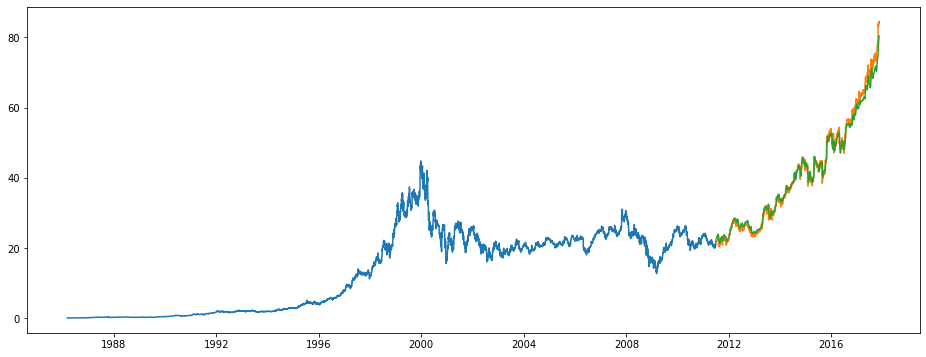

In [78]:
# Plotar grafico

#dataframe com os dados de treino e teste
curva_treino_msft = data_msft[0:train_data_len_msft]
curva_teste_msft = data_msft[train_data_len_msft:len(data_msft)]
curva_teste_msft['Predictions'] = close_msft

#plotando gráfico comparando os resultados da predição e os dados reais
#o resultado da predição é a curva de cor verde
plt.figure(figsize = (16,6))
plt.plot(curva_treino_msft['Close'])
plt.plot(curva_teste_msft[['Close','Predictions']])

In [79]:
# Comentários: 

# O número de neuronios na camada oculta foi escolhido de forma a obter resultados bons para os 4 modelos,
# com o objetivo de manter um padrão entre eles. Para a ação goog, o resultado obtido foi bom. 
# Para as outras ações, o resultado foi muito bom. Porém, pode ter havido problemas de overfitting. 
# Isso poderia ser resolvido diminuindo o tamanho dos dados de treino, diminuindo a quantidade de neurônios da 
# camada oculta, ou diminuindo a quantidade de épocas. Para comprovar se realmente houve esse erro, uma das possibilidades
# seria examinar o comportamento dos modelos com dados novos.
# Por se tratar de um modelo de regressão, não é possível utilizar ferramentas como matriz de confusão, disponível 
# na biblioteca sklearn